# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE  

![alt text](https://drive.google.com/uc?id=1EW5NEV_lA6qAIpb1ZCzRMyZq9zjo9_Gr)

![alt text](https://drive.google.com/uc?id=1mVeeFi7cusk7ljpMf0cSSjLvi0Z3gaEY)

![alt text](https://drive.google.com/uc?id=1TI6QAMfhEZ59fpEp788ZVVYLr4IGXa5N)

![alt text](https://drive.google.com/uc?id=1gYn6Dyi7mL1RDbZQzTKuirkw7GnbWwK6)

# TASK #2: IMPORT MODEL WITH PRE-TRAINED WEIGHTS

In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import PIL.Image
import cv2
import random
from PIL import Image # Python Image Library is a library that adds support for opening, manipulating, and saving many different
                      # image file formats

In [2]:
tf.__version__

'2.16.1'

In [3]:
# Load trained inceptionNet model, for more information on Transfer Learning, check previous case studies
base_model = tf.keras.applications.InceptionV3(include_top = False, weights = 'imagenet')

MINI CHALLENGE #1:
- How many total parameters exist in inceptionNet V3?
- Set include top = True and indicate how many total parameters exist now.

# TASK #3: GET AN IMAGE AND PRE-PROCESS IT

In [4]:
# Open the first image
# Source: https://www.pxfuel.com/en/free-photo-xxgfs
img_1 = Image.open('Creative AI Dataset/cycle.jpeg')

# Open the second image
# Source: https://commons.wikimedia.org/wiki/File:Georges_Garen_embrasement_tour_Eiffel.jpg
img_2 = Image.open('Creative AI Dataset/dog.jpeg')

# Blend the two images

image = Image.blend(img_1, img_2, 0.5) # alpha --> The interpolation alpha factor. If alpha is 0.0, a copy of the first image is returned.
# If alpha is 1.0, a copy of the second image is returned.

# Save the blended image
image.save("img_300.jpg")

In [5]:
# Load the image
Sample_Image = tf.keras.preprocessing.image.load_img('img_300.jpg')

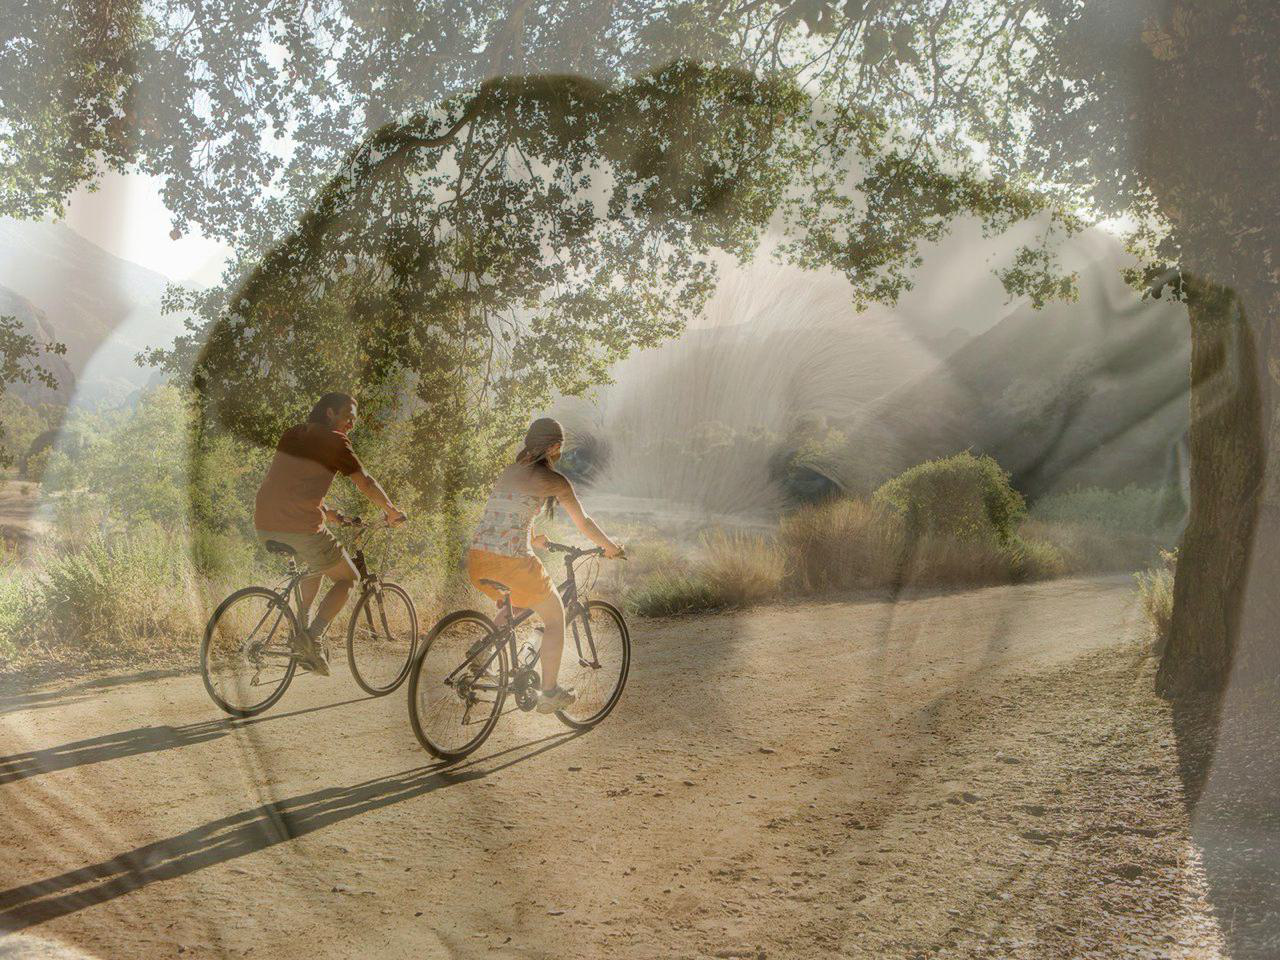

In [7]:
Sample_Image

In [8]:
# Get the shape of the image
np.shape(Sample_Image)

(960, 1280, 3)

In [9]:
# Check out the type of the image
type(Sample_Image)

PIL.JpegImagePlugin.JpegImageFile

In [10]:
# Convert to numpy array
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

# Sample_Image = np.array(Sample_Image)

In [11]:
# Confirm that the image is converted to Numpy array
type(Sample_Image)

numpy.ndarray

In [12]:
# Obtain the max and min values
print('min pixel values = {}, max pixel values = {}'.format(Sample_Image.min(), Sample_Image.max()))

min pixel values = 0.0, max pixel values = 255.0


In [13]:
# Normalize the input image
Sample_Image = np.array(Sample_Image)/255.0
Sample_Image.shape

(960, 1280, 3)

In [14]:
# Let's verify normalized images values!
print('min pixel values = {}, max pixel values = {}'.format(Sample_Image.min(), Sample_Image.max()))

min pixel values = 0.0, max pixel values = 1.0


In [15]:
Sample_Image = tf.expand_dims(Sample_Image, axis = 0)

In [16]:
np.shape(Sample_Image)

TensorShape([1, 960, 1280, 3])

MINI CHALLENGE #2:
- Perform the opposite of expand dimension
- Plot the image

# TASK #4: RUN THE PRETRAINED MODEL AND EXPLORE ACTIVATIONS

# NOTES:
- Select a layer and attempt at maximizing the loss which is the activations generated by the layer of interest.
- We can select any layer we choose, early layers generate simple features such as edges and deep layers generate more complex features such as entire face, car or tree.
- Inception network has multiple concatenated layers named 'mixed'

In [17]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d[0]… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [18]:
# Maximize the activations of these layers

names = ['mixed3', 'mixed5', 'mixed7']

# names = ['mixed3']

layers = [base_model.get_layer(name).output for name in names]

# Create the feature extraction model
deepdream_model = tf.keras.Model(inputs = base_model.input, outputs = layers)

In [19]:
deepdream_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d[0]… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 8,975,264 (34.24 MB)

 Trainable params: 8,956,448 (34.17 MB)

 Non-trainable params: 18,816 (73.50 KB)

In [20]:
# Let's run the model by feeding in our input image and taking a look at the activations "Neuron outputs"
activations = deepdream_model(Sample_Image)
activations

[<tf.Tensor: shape=(1, 58, 78, 768), dtype=float32, numpy=
 array([[[[0.        , 0.24061185, 0.        , ..., 0.7835798 ,
           1.1040092 , 0.34283996],
          [0.        , 0.        , 0.        , ..., 0.669058  ,
           0.3897208 , 0.        ],
          [1.6512202 , 0.        , 0.19975764, ..., 0.        ,
           0.2632184 , 0.33013558],
          ...,
          [0.        , 0.        , 1.1125524 , ..., 0.        ,
           0.32384765, 0.3716359 ],
          [0.44121513, 0.        , 0.43005618, ..., 0.36069596,
           1.2579328 , 0.9452733 ],
          [0.6491997 , 0.        , 0.        , ..., 0.36069596,
           1.2579328 , 1.4134912 ]],
 
         [[2.2616847 , 0.        , 0.15994376, ..., 0.8599408 ,
           0.        , 0.71498114],
          [0.        , 0.        , 0.        , ..., 0.01333177,
           0.        , 0.31513467],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.26174688],
          ...,
        

In [21]:
len(activations)

3

MINI CHALLENGE #3:
- Generate the activations for a deeper layer such as 'mixed8' and 'mixed9'.
- What is the size of the generated activations?
- Combine 4 activations from early and deeper layers such as 'mixed3', 'mixed5', 'mixed8', 'mixed9'


# TASK #5: UNDERSTAND HOW DEEP DREAM ALGORITHM WORKS

![alt text](https://drive.google.com/uc?id=1pbBZWp8JCgIWBzrXhDoQZSi5ekeR2Sga)

Source #1: https://www.topbots.com/advanced-topics-deep-convolutional-neural-networks/

Source #2: https://wccftech.com/nvidia-demo-skynet-gtc-2014-neural-net-based-machine-learning-intelligence/

![alt text](https://drive.google.com/uc?id=1mh4OUKw5cFjxFa7zW-JZyLwHAQHRIW_-)

![alt text](https://drive.google.com/uc?id=1k1Hp6M1GB9qCaiPPAJQgGwTh5VNzEm4l)

![alt text](https://drive.google.com/uc?id=1usz7K6Bmo_9u7n56NV3PCvLBRgSN1TkQ)

![alt text](https://drive.google.com/uc?id=1R7_C4r4vy2tqIB5Pi-ltyY2N_WC6jSYF)

# TASK #6: UNDERSTAND HOW TO PERFORM GRADIENT CALCULATION AND TF.GRADIENTTAPE()

- tf.GradientTape() is used to record operations for automatic differentiation
- For example, Let's assume we have the following functions y = x^3.
- The gradient at x = 2 can be computed as follows: dy_dx = 3 * x^2 = 3 * 2^2 = 12.


In [22]:
x = tf.constant(2.0)

In [23]:
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x * x
dy_dx = g.gradient(y, x) # Will compute to 12

In [24]:
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

MINI CHALLENGE #4:
- Using tf.GradientTape(), calculate the gradient of y = x^4 + x^5 at x = 5
- Verify your answer by manually differentation the equation

In [25]:
x = tf.constant(5.0)

In [26]:
with tf.GradientTape() as g:
  g.watch(x)
  y = (x * x * x * x) + (x * x * x * x * x)
dy_dx = g.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=3625.0>

# TASK #7: IMPLEMENT DEEP DREAM ALGORITHM - STEP #1 LOSS CALCULATION

- CREDITS: The DeepDream Code has been adopted from Keras Documentation:
- https://www.tensorflow.org/tutorials/generative/deepdream

In [27]:
# Since the cal_closs function includes expand dimension, let's squeeze the image (reduce_dims)
Sample_Image.shape

TensorShape([1, 960, 1280, 3])

In [28]:
Sample_Image = tf.squeeze(Sample_Image, axis = 0)

In [29]:
Sample_Image.shape

TensorShape([960, 1280, 3])

In [30]:
def calc_loss(image, model):
# Function used for loss calculations
# It works by feedforwarding the input image through the network and generate activations
# Then obtain the average and sum of those outputs

  img_batch = tf.expand_dims(image, axis=0) # Convert into batch format
  layer_activations = model(img_batch) # Run the model
  print('ACTIVATION VALUES (LAYER OUTPUT) =\n', layer_activations)
  # print('ACTIVATION SHAPE =\n', np.shape(layer_activations))

  losses = [] # accumulator to hold all the losses
  for act in layer_activations:
    loss = tf.math.reduce_mean(act) # calculate mean of each activation
    losses.append(loss)

  print('LOSSES (FROM MULTIPLE ACTIVATION LAYERS) = ', losses)
  print('LOSSES SHAPE (FROM MULTIPLE ACTIVATION LAYERS) = ', np.shape(losses))
  print('SUM OF ALL LOSSES (FROM ALL SELECTED LAYERS)= ', tf.reduce_sum(losses))

  return  tf.reduce_sum(losses) # Calculate sum

In [31]:
loss = calc_loss(tf.Variable(Sample_Image), deepdream_model)

ACTIVATION VALUES (LAYER OUTPUT) =
 [<tf.Tensor: shape=(1, 58, 78, 768), dtype=float32, numpy=
array([[[[0.        , 0.24061185, 0.        , ..., 0.7835798 ,
          1.1040092 , 0.34283996],
         [0.        , 0.        , 0.        , ..., 0.669058  ,
          0.3897208 , 0.        ],
         [1.6512202 , 0.        , 0.19975764, ..., 0.        ,
          0.2632184 , 0.33013558],
         ...,
         [0.        , 0.        , 1.1125524 , ..., 0.        ,
          0.32384765, 0.3716359 ],
         [0.44121513, 0.        , 0.43005618, ..., 0.36069596,
          1.2579328 , 0.9452733 ],
         [0.6491997 , 0.        , 0.        , ..., 0.36069596,
          1.2579328 , 1.4134912 ]],

        [[2.2616847 , 0.        , 0.15994376, ..., 0.8599408 ,
          0.        , 0.71498114],
         [0.        , 0.        , 0.        , ..., 0.01333177,
          0.        , 0.31513467],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.26174688],
       

In [32]:
loss # Sum up the losses from both activations

<tf.Tensor: shape=(), dtype=float32, numpy=0.52848923>

MINI CHALLENGE #5:
- What is the sum of all losses when 'mixed3' layer is the only layer used for activations generation?

# TASK #8: IMPLEMENT DEEP DREAM ALGORITHM - STEP #2 (CALCULATE THE GRADIENT)

- In this step, we will rely on the loss that has been calculated in the previous step and calculate the gradient with respect to the given input image and then add it to the input original image.
- Doing so iteratively will result in feeding images that continiously and increasingly excite the neurons and generate more dreamy like images!


In [33]:
# When you annotate a function with tf.function, the function can be called like any other python defined function.
# The benefit is that it will be compiled into a graph so it will be much faster and could be executed over TPU/GPU

@tf.function
def deepdream(model, image, step_size):
    with tf.GradientTape() as tape:
      # This needs gradients relative to `img`
      # `GradientTape` only watches `tf.Variable`s by default
      tape.watch(image)
      loss = calc_loss(image, model) # call the function that calculate the loss

    # Calculate the gradient of the loss with respect to the pixels of the input image.
    # The syntax is as follows: dy_dx = g.gradient(y, x)
    gradients = tape.gradient(loss, image)

    print('GRADIENTS =\n', gradients)
    print('GRADIENTS SHAPE =\n', np.shape(gradients))

    # tf.math.reduce_std computes the standard deviation of elements across dimensions of a tensor
    gradients /= tf.math.reduce_std(gradients)

    # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
    # You can update the image by directly adding the gradients (because they're the same shape!)
    image = image + gradients * step_size
    image = tf.clip_by_value(image, -1, 1)

    return loss, image

In [34]:
def run_deep_dream_simple(model, image, steps = 100, step_size = 0.01):
  # Convert from uint8 to the range expected by the model.
  image = tf.keras.applications.inception_v3.preprocess_input(image)

  for step in range(steps):
    loss, image = deepdream(model, image, step_size)

    if step % 100 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(deprocess(image))
      plt.show()
      print ("Step {}, loss {}".format(step, loss))

  # clear_output(wait=True)
  plt.figure(figsize=(12,12))
  plt.imshow(deprocess(image))
  plt.show()

  return deprocess(image)

In [35]:
def deprocess(image):
  image = 255*(image + 1.0)/2.0
  return tf.cast(image, tf.uint8)


In [36]:
Sample_Image.shape

TensorShape([960, 1280, 3])

In [37]:
def calc_loss(image, model):
    # Ensure the input image has the correct shape
    assert len(image.shape) == 4, f"Expected input shape to be 4D, got {image.shape}"
    
    # Pass the image directly to the model (no additional batch dimension needed)
    layer_activations = model(image)  # Run the model
    print("ACTIVATION VALUES (LAYER OUTPUT):", layer_activations)

    # Define the loss calculation (sum of all activations for simplicity)
    losses = [tf.reduce_mean(act) for act in layer_activations]
    return tf.reduce_sum(losses)



# TASK #9: (VIDEO) APPLY DEEPDREAM TO GENERATE A SERIES OF IMAGES

In [40]:
image = tf.keras.preprocessing.image.load_img("img_300.jpg")

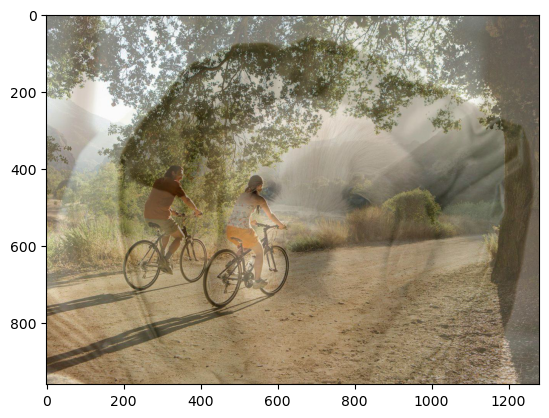

In [41]:
plt.imshow(image)

In [43]:
# Name of the folder
dream_name = 'cycle_dog'

In [44]:
# Blended image dimension

x_size = 910 # larger the image longer is going to take to fetch the frames
y_size = 605

In [45]:
# Define Counters
created_count = 0
max_count = 50

In [46]:
# This helper function loads an image and returns it as a numpy array of floating points

def load_image(filename):
    image = PIL.Image.open(filename)
    return np.float32(image)

In [47]:
import os
import cv2
import numpy as np
from PIL import Image

# Replace with the actual size of the images
x_size, y_size = 910, 605
created_count = 0
max_count = 50  # Maximum number of iterations
dream_name = "cycle_cog"

for i in range(0, 50):
    img_path = f'creative ai 2/{dream_name}/img_{i+1}.jpg'

    if os.path.isfile(img_path):
        print(f"Image {i+1} present already, continuing...")
        continue

    # Load the initial image
    initial_img_path = f'creative ai 2/{dream_name}/img_0.jpg'
    img_result = cv2.imread(initial_img_path)

    if img_result is None:
        print(f"Error: Unable to load image at path {initial_img_path}. Check the file path and integrity.")
        break

    # Ensure the image is in RGB format
    img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

    # Zoom the image
    x_zoom, y_zoom = 2, 1  # Controls the zoom speed
    img_result = img_result[y_zoom:y_size - y_zoom, x_zoom:x_size - x_zoom]
    img_result = cv2.resize(img_result, (x_size, y_size))

    # Adjust RGB values for artistic effect
    img_result[:, :, 0] += 2  # Red
    img_result[:, :, 1] += 2  # Green
    img_result[:, :, 2] += 2  # Blue

    # Add batch dimension to match the model input requirements
    img_result = np.expand_dims(img_result, axis=0)  # Shape becomes (1, 605, 910, 3)

    # Run the DeepDream model
    img_result = run_deep_dream_simple(
        model=deepdream_model, image=img_result, steps=500, step_size=0.001
    )

    # Clip, convert to uint8, and remove the batch dimension
    img_result = np.clip(img_result, 0, 255).astype(np.uint8)
    img_result = img_result[0]  # Remove batch dimension (now 3D: 605, 910, 3)

    # Save the image
    result_img = Image.fromarray(img_result, mode='RGB')
    result_img.save(img_path)

    created_count += 1
    if created_count > max_count:
        break


Error: Unable to load image at path creative ai 2/cycle_cog/img_0.jpg. Check the file path and integrity.


[ WARN:0@142.538] global loadsave.cpp:241 findDecoder imread_('creative ai 2/cycle_cog/img_0.jpg'): can't open/read file: check file path/integrity


# TASK #10: (VIDEO) CREATE A VIDEO FROM ALL THE FRAMES

In [56]:
# Unzip the folder

from zipfile import ZipFile
file_name = "Creative AI Dataset/mars_eiffel.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [57]:
# Path of all the frames

dream_path = 'cycle_dog'

In [58]:
# Define the codec and create VideoWriter object
# Download FFmeg

fourcc = cv2.VideoWriter_fourcc(*'XVID') # FourCC is a 4-byte code used to specify the video codec

out = cv2.VideoWriter('ddwvideo.avi', fourcc , 5.0, (910, 605)) # Specify the fourCC, frames per second (fps),
                                                                            # and frame size
# The frames per second value is depends on few important things
# 1. The number of frames we have created. Less number of frames brings small fps
# 2. The larger the image the bigger the fps value. For example, 1080 pixel image can bring 60 fps

In [59]:
for i in range(9999999999999):

    # Get into the dream directory and looks for the number of images and then figure out what is the latest image. Hence with
    # this image we are going to start with and let it dream on and on
    if os.path.isfile('Creative AI Dataset/img_{}.jpg'.format(i+1)):
        pass
    # Figure out how long the dream is
    else:
        dream_length = i
        break

In [60]:
dream_length

0

In [61]:
for i in range(dream_length):

    # Build the frames of cv2.VideoWriter
    img_path = os.path.join(dream_path,'img_{}.jpg'.format(i)) # join the dream path

    print(img_path) # print the image path

    frame = cv2.imread(img_path)
    out.write(frame)

out.release()

# GREAT JOB!

# MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1:
- How many total parameters exist in inceptionNet V3?
- Set include top = True and indicate how many total parameters exist now.

In [54]:
total_params_include_top = 23_851_784
total_params_exclude_top = 21_802_784


MINI CHALLENGE #2:

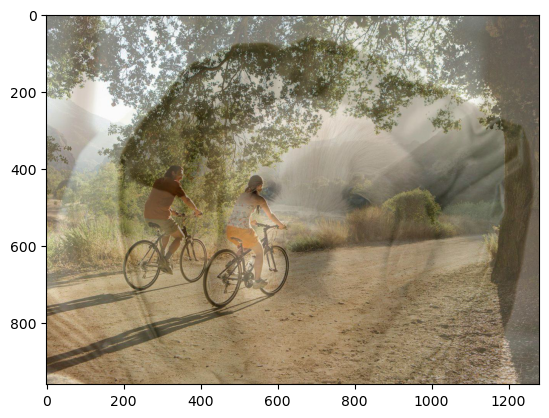

In [55]:
plt.imshow(np.squeeze(Sample_Image))

MINI CHALLENGE #3:
- Generate the activations for a deeper layer such as 'mixed8' and 'mixed9'.
- What is the size of the generated activations?
- Combine 4 activations from early and deeper layers such as 'mixed3', 'mixed5', 'mixed8', 'mixed9'

In [65]:
names = ['mixed8', 'mixed9']
# shape=(1, 13, 21, 1280)
names = ['mixed3', 'mixed5', 'mixed8', 'mixed9']

MINI CHALLENGE #4:
- Using tf.GradientTape(), calculate the gradient of y = x^4 + x^5 at x = 5
- Verify your answer by manually differentation the equation

In [66]:
x = tf.constant(5.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = (x * x * x * x) + (x * x * x * x * x)
dy_dx = g.gradient(y, x) # Will compute to 12
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=3625.0>

In [67]:
# 500+3125 = 3625

MINI CHALLENGE #5:
- What is the sum of all losses when 'mixed3' layer is the only layer used for activations generation?

In [68]:
# <tf.Tensor: shape=(), dtype=float32, numpy=0.36584973>